__Классификация с помощью kNN. Кластеризация K-means__

__1. К алгоритму kNN, представленному на уроке, 
    - реализовать добавление весов для соседей в зависимости от номера соседа.
    - реализовать добавление весов для соседей в зависимости от расстояния до соседа. 
Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.
Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, 
сделать выводы. 4__

In [29]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [30]:
# Используем евклидову метрику. Реализуем функцию для ее подсчета.
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

# От номера соседа 𝑖 веса можно определять как 1/indx
def get_class_weight_by_indx(indx):    
    return (1.0/indx)

def get_class_weight_by_distance(dist, q = 1):    
    return (np.float_power(dist/(dist+q), 2.5))


# Реализуем алгоритм поиска k ближайших соседей.
def knn(x_train, y_train, x_test, k):    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            distance *= get_class_weight_by_indx(1+i)
            
            distance = get_class_weight_by_distance(distance)            
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append( (distance, y_train[i]) )
        
        # создаем словарь со всеми возможными классами и инициализируем их 0
        classes = {class_item: 0 for class_item in set(y_train)}
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances,reverse=False)[0:k]:
            classes[d[1]] += 1
        print(f' k: {k}, x:{x}, test_distances:{sorted(test_distances,reverse=False)[0:k]}')
        
        
#        answer = sorted(classes, key=classes.get, reverse=False)[-1]
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(answer)
    return answers

# Напишем функцию для вычисления точности
def accuracy(pred, y):
    return sum(pred == y) / len(y)

# Построим график распределения классов.
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02
    
    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()


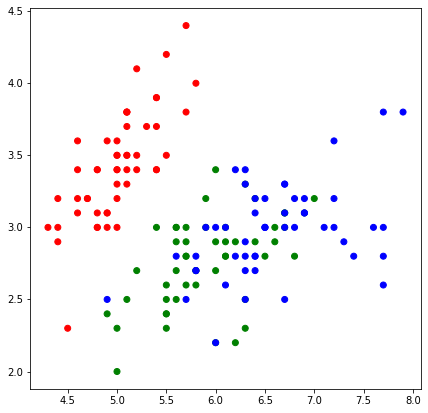

In [23]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [24]:
#k = 3
#get_graph(X_train, y_train, k)

In [25]:
k_lst = [1, 2, 3, 4, 5, 7, 9, 13]

for k in k_lst:
    y_pred = knn(X_train, y_train, X_test, k)
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

 k: 1, x:[5.8 4. ], test_distances:[(0.22360679774997896, 0)]
 k: 1, x:[5.1 2.5], test_distances:[(0.1999999999999993, 2)]
 k: 1, x:[6.6 3. ], test_distances:[(0.09999999999999964, 2)]
 k: 1, x:[5.4 3.9], test_distances:[(0.19999999999999973, 0)]
 k: 1, x:[7.9 3.8], test_distances:[(0.20000000000000018, 2)]
 k: 1, x:[6.3 3.3], test_distances:[(0.0, 2)]
 k: 1, x:[6.9 3.1], test_distances:[(0.0, 1)]
 k: 1, x:[5.1 3.8], test_distances:[(0.0, 0)]
 k: 1, x:[4.7 3.2], test_distances:[(0.0, 0)]
 k: 1, x:[6.9 3.2], test_distances:[(0.09999999999999964, 1)]
 k: 1, x:[5.6 2.7], test_distances:[(0.09999999999999964, 2)]
 k: 1, x:[5.4 3.9], test_distances:[(0.19999999999999973, 0)]
 k: 1, x:[7.1 3. ], test_distances:[(0.10000000000000053, 2)]
 k: 1, x:[6.4 3.2], test_distances:[(0.0, 2)]
 k: 1, x:[6.  2.9], test_distances:[(0.09999999999999964, 1)]
 k: 1, x:[4.4 3.2], test_distances:[(0.1999999999999993, 0)]
 k: 1, x:[5.8 2.6], test_distances:[(0.09999999999999964, 1)]
 k: 1, x:[5.6 3. ], test_dis

__без учета веса по индексу__<br>
Точность алгоритма при k = 1: 0.667<br>
Точность алгоритма при k = 2: 0.667<br>
Точность алгоритма при k = 3: 0.733<br>
Точность алгоритма при k = 4: 0.833<br>
Точность алгоритма при k = 5: 0.867<br>
Точность алгоритма при k = 7: 0.800<br>
Точность алгоритма при k = 9: 0.867<br>
Точность алгоритма при k = 13: 0.833<br>

__с учетом веса по индексу__<br>
очность алгоритма при k = 1: 0.733<br>
Точность алгоритма при k = 2: 0.767<br>
Точность алгоритма при k = 3: 0.667<br>
Точность алгоритма при k = 4: 0.733<br>
Точность алгоритма при k = 5: 0.667<br>
Точность алгоритма при k = 7: 0.767<br>
Точность алгоритма при k = 9: 0.800<br>
Точность алгоритма при k = 13: 0.867<br>

__с учетом веса по дистанции__<br>
Точность алгоритма при k = 1: 0.667<br>
Точность алгоритма при k = 2: 0.667<br>
Точность алгоритма при k = 3: 0.733<br>
Точность алгоритма при k = 4: 0.833<br>
Точность алгоритма при k = 5: 0.867<br>
Точность алгоритма при k = 7: 0.800<br>
Точность алгоритма при k = 9: 0.867<br>
Точность алгоритма при k = 13: 0.833<br>

__с учетом веса по индексу и дистанции__<br>
Точность алгоритма при k = 1: 0.733<br>
Точность алгоритма при k = 2: 0.767<br>
Точность алгоритма при k = 3: 0.667<br>
Точность алгоритма при k = 4: 0.733<br>
Точность алгоритма при k = 5: 0.667<br>
Точность алгоритма при k = 7: 0.767<br>
Точность алгоритма при k = 9: 0.800<br>
Точность алгоритма при k = 13: 0.867<br>




- $w(d) = \frac{1}{(d+a)^{b}}$, брать вес $\frac{1}{d}$ по аналогии с номером соседа - неудачное решение, так как при $d = 0$ вес будет бесконечно большим, что приводит к переобучению

- $w(d) = \begin{cases}
\frac{d(z_{k}, x) - d(z_{i}, x)}{d(z_{k}, x) - d(z_{1}, x)}, & d(z_{k}, x) \neq d(z_{1}, x) \\ 
1, & d(z_{k}, x) = d(z_{1}, x)
\end{cases}$.

Если внимательно посмотреть то последняя система написана с ошибкой! ее можн опредставить так:<br>
- $w(d) = \begin{cases}
1, & d(z_{k}, x) \neq d(z_{1}, x) \\ 
1, & d(z_{k}, x) = d(z_{1}, x)
\end{cases}$.


__2. (опция). Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).__

In [31]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

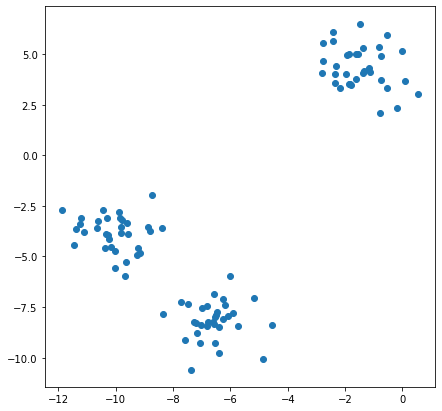

In [32]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [51]:
def get_cluster_metric(centroids, clusters):
    result_dist = 0
    # Итерация по центроидам
    for key, centroid in zip(clusters.keys(), centroids):
        temp_sum = 0
        # Итерация по точкам в кластере
        for point in clusters[key]:
            # Расчет суммы квадратов расстояний внутри одного кластера
            temp_sum += e_metrics(point, centroid)**2
        # Сумма по всем кластерам    
        result_dist += temp_sum / len(clusters[key])
    return result_dist


# В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. 
# В качестве центроидов выберем первые k элементов датасета.Реализуем основной цикл алгоритма.
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
        #print(f' get_cluster_metric(centroids, clusters): {get_cluster_metric(centroids, classes)}')
    
    return old_centroids, classes


# Напишем функцию для визуализации кластеров
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()


In [45]:
# определим максимальное количество итераций
max_iterations = [1, 3, 5, 10]

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

максимальное количество итераций: 1
 get_cluster_metric(centroids, clusters): 9.717315357132936


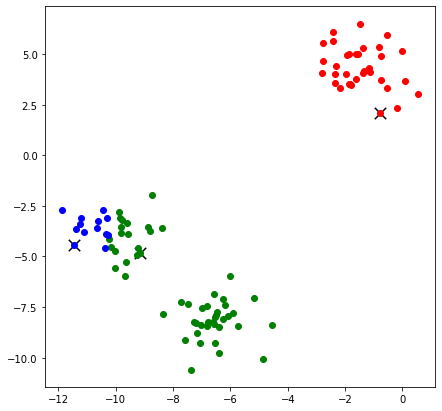

максимальное количество итераций: 3
 get_cluster_metric(centroids, clusters): 9.717315357132936
 get_cluster_metric(centroids, clusters): 9.013160241585421
 get_cluster_metric(centroids, clusters): 8.1564423569448


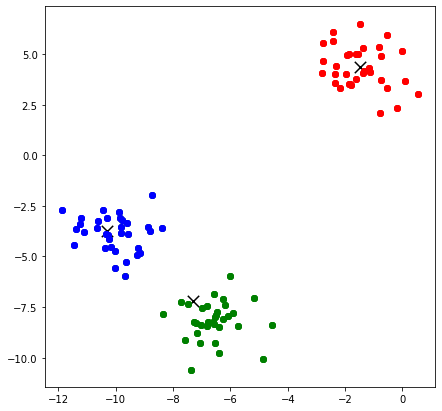

максимальное количество итераций: 5
 get_cluster_metric(centroids, clusters): 9.717315357132936
 get_cluster_metric(centroids, clusters): 9.013160241585421
 get_cluster_metric(centroids, clusters): 8.1564423569448
 get_cluster_metric(centroids, clusters): 7.5482109237669786
 get_cluster_metric(centroids, clusters): 7.113141696630997


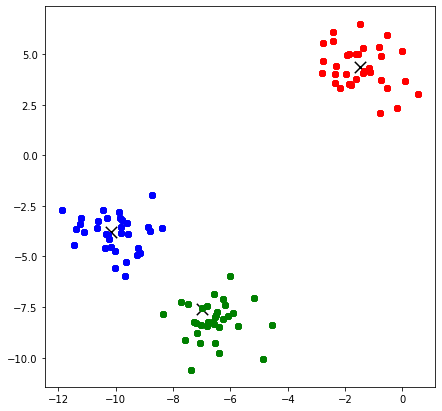

максимальное количество итераций: 10
 get_cluster_metric(centroids, clusters): 9.717315357132936
 get_cluster_metric(centroids, clusters): 9.013160241585421
 get_cluster_metric(centroids, clusters): 8.1564423569448
 get_cluster_metric(centroids, clusters): 7.5482109237669786
 get_cluster_metric(centroids, clusters): 7.113141696630997
 get_cluster_metric(centroids, clusters): 6.789961698481411
 get_cluster_metric(centroids, clusters): 6.54144194245213
 get_cluster_metric(centroids, clusters): 6.344769254596999
 get_cluster_metric(centroids, clusters): 6.185416761317302
 get_cluster_metric(centroids, clusters): 6.053762570489914


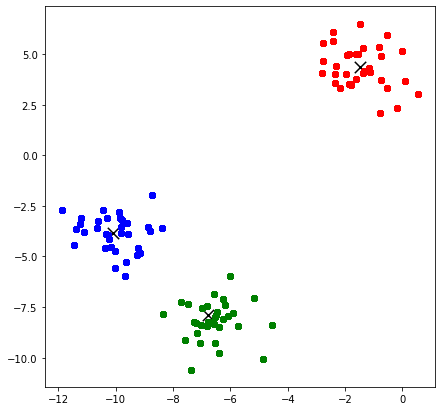

In [46]:
for max_it in max_iterations:
    print(f'максимальное количество итераций: {max_it}')
    centroids, clusters = kmeans(X, k, max_it, min_distance)
    visualize(centroids, clusters)

In [56]:
def get_plot_cluster_metric_vs_nclusters(X, k_max, max_iterations=10, min_distance=1e-4):
    c_metric = []
    for k in range(1, k_max + 1):
        centroids, classes = kmeans(X, k, max_iterations, min_distance)
        c_metric.append(get_cluster_metric(centroids, classes))
        
    plt.figure(figsize=(10, 6))
    plt.xlim(0.9, k_max + 0.1)
    plt.ylim(0, max(c_metric) + 0.1*max(c_metric))
    plt.plot(range(1, k_max+1), c_metric)
    plt.xlabel('Количество классов')
    plt.ylabel('Среднее квадратичное внутриклассовое расстояние')
    plt.title('Зависимость расстояния от количества классов')
    plt.grid()
    plt.show()

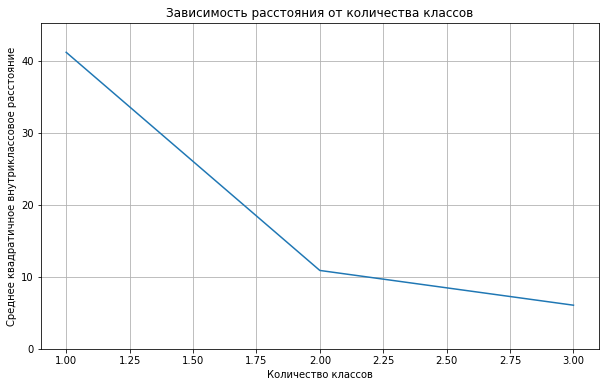

In [57]:
get_plot_cluster_metric_vs_nclusters(X, k)